# Understanding the problem

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services.<br>

Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.<br>

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.<br>

We are working with one such company in Telecom Industry. They are a fixed wireless telecommunications network provider.<br>

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

# Aim of this project

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, **Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter**.  

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/vinay/OneDrive/Desktop/FlipRobo/Micro-Credit-Project/Micro Credit Project/Data file.csv')

# Understanding data

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.shape

(209593, 37)

The data set contains **20,9593 rows** and **37 columns**

Column 'label' would be our target column, where **1 represents Non-Defaulter** and **0 represents Defaulter**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

There are **No Null Values**. We have 21 float type columns, 13 integer type and 3 Object(or categorical columns)<br>
Here column "Unnamed: 0" and "msisdn" are not important as "Unnamed: 0" would be the serial number of entry and "msisdn":mobile number of user (that can be random)

Lets understand if the problem statement is  balanced or imbalanced

In [6]:
defaulter = df[df['label']==0]
Non_defaulter = df[df['label']==1]
print(defaulter.shape,"   ", Non_defaulter.shape)

(26162, 37)     (183431, 37)


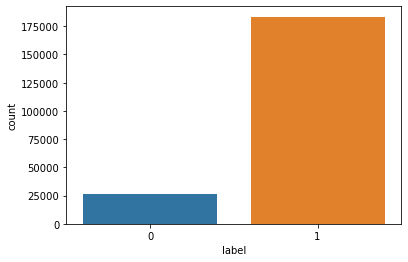

In [7]:
sns.countplot(df['label'])
plt.savefig('countplot_label.png')

This is clearly a **Bi-Classification problem imbalance data problem statement** as the defaulters rows are just 26162 (12.5%) whereas non-defaulters are 183431(87.4%)<br>
We will need to solve imbalance data problem.

In [8]:
#Statistical Summary
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


1) All the columns are not getting displayed in this summary, so we will try to look out for outliers and Skweness in the Dataset in further steps.<br>
2) Looking at the displayed columns, there must be huge outliers in so many columns.<br>
3) We can observe that few of the **columns have negative values** that may be an error as looking at the column description and our problem statement, it isn't possible for our datasets to have negative values. These might be a human error.<br>
4) Lets's treat these negative values to positive without effecting positive values.

# Treating Errors and data processing

Before that let's remove columns {**Unnamed: 0**: as this is just a serial entry for each user, **msisdn**: as this is the object variable containing mobile number, **pcircle**: is just the operator name that isn't useful, **pdate**:  would be the date of activation(which would not help in our problem.}

In [9]:
#removed the columns
df = df.drop(['Unnamed: 0', "msisdn", "pcircle", "pdate"], axis=1)

In [10]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [11]:
#iterated over the columns into absolute function from numpy to give is only positive values for whole data set.
for i in df.columns:
    df[i] = np.abs(df[i])

In [12]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.808718,5381.431293,6082.544140,2715.376558,3509.497148,3756.125844,3712.204801,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.032666,9220.606472,10918.796572,4294.257439,5754.630600,53905.872857,53374.833299,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1095.750000,1347.220000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3362.350000,4204.510000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


So the data set is treated with negative values, let's move forward.

# Understanding features

<AxesSubplot:xlabel='aon', ylabel='count'>

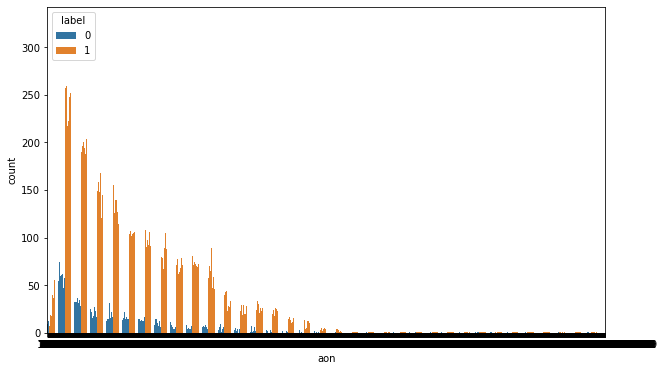

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df['aon'], hue = df['label'])
#aon: age on cellular network in days

Text(0.5, 1.0, 'Non_Defaulter')

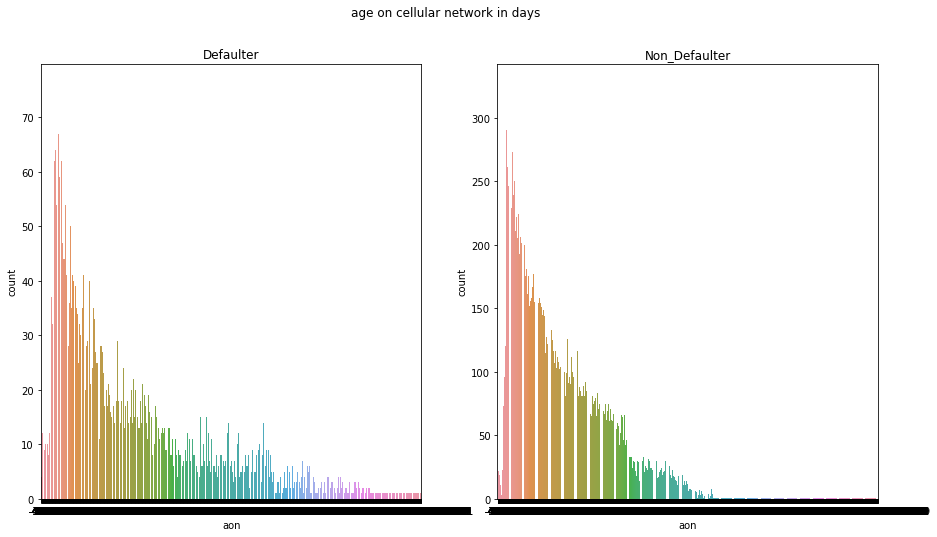

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('age on cellular network in days')
sns.countplot(ax = ax[0], x=defaulter.aon)
ax[0].set_title("Defaulter")

sns.countplot(ax = ax[1], x=Non_defaulter.aon)
ax[1].set_title("Non_Defaulter")

Looking at this graph we can see that defaulter have an "age(days) on cellular network in days" not more than 60-65 day(max). Non_defaulters have a higher age(days) of activation. However, on the Non_defaulter side we can see that the plot is simialar to the Defaulters.

As the columns or features are 32 It will take a lot of time for us to visulize and infer each column or feature, I will try and retrieve the corelation of the data set and sort them. <br>
This will give us an overview on how each feature is correlated with our target variable

<AxesSubplot:>

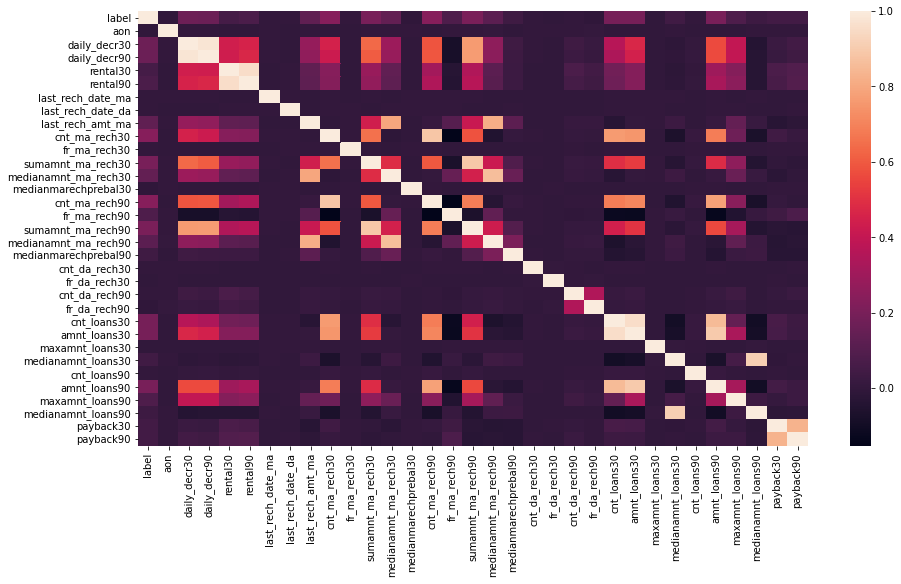

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr())

In [16]:
corr_relation = df.corr()
corr_relation['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168293
daily_decr90            0.166146
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.076033
rental30                0.058645
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.037126
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003730
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

Looking at the correlation, aon:"age on cellular network in days" has -0.003785 correlation.<br>
Columns ['cnt_loans90','cnt_da_rech30','last_rech_date_ma','cnt_da_rech90','last_rech_date_da','fr_ma_rech30','maxamnt_loans30','fr_da_rech30','aon','medianmarechprebal30','fr_da_rech90'] has very low correlation (close to 0) with our target variable 'label'. I will drop them.

In [17]:
df = df.drop(['cnt_loans90','cnt_da_rech30','last_rech_date_ma','cnt_da_rech90','last_rech_date_da','fr_ma_rech30','maxamnt_loans30','fr_da_rech30','aon','medianmarechprebal30','fr_da_rech90'], axis=1)

Let us understand the features with high correlation comparatively.

In [18]:
df['cnt_ma_rech30'].describe()

count    209593.000000
mean          3.978057
std           4.256090
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max         203.000000
Name: cnt_ma_rech30, dtype: float64

Text(0.5, 1.0, 'Non_Defaulter')

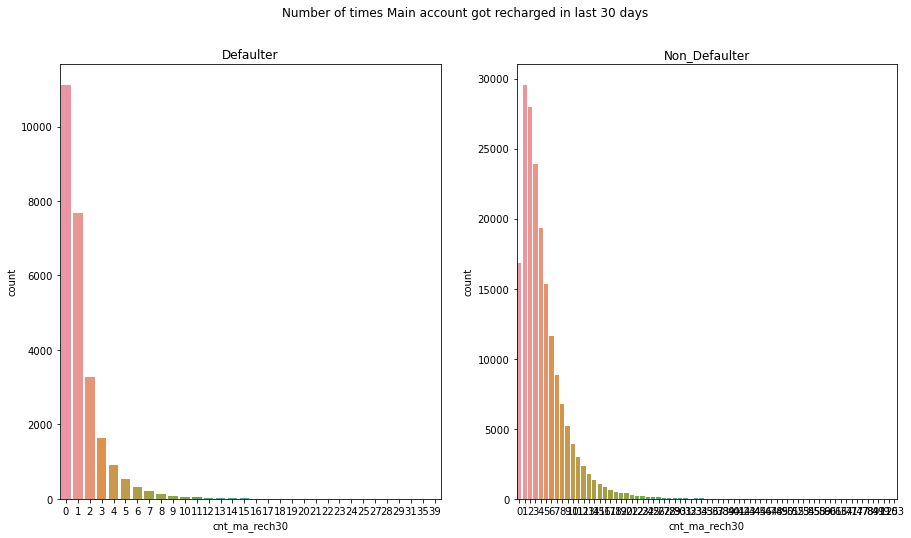

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('Number of times Main account got recharged in last 30 days')
sns.countplot(ax = ax[0], x=defaulter.cnt_ma_rech30)
ax[0].set_title("Defaulter")

sns.countplot(ax = ax[1], x=Non_defaulter.cnt_ma_rech30)
ax[1].set_title("Non_Defaulter")

#cnt_ma_rech30: Number of times Main account got recharged in last 30 days

Text(0.5, 1.0, 'Non_Defaulter')

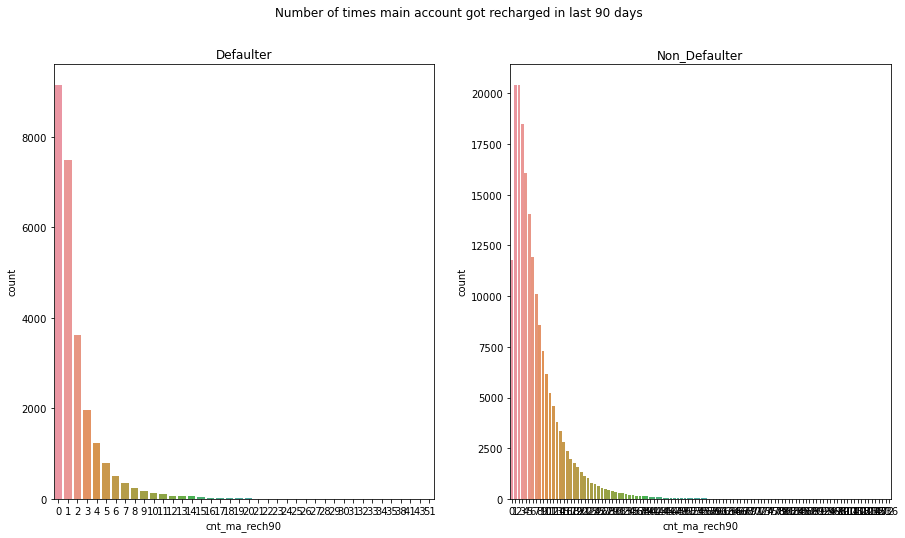

In [20]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('Number of times main account got recharged in last 90 days')
sns.countplot(ax = ax[0], x=defaulter.cnt_ma_rech90)
ax[0].set_title("Defaulter")

sns.countplot(ax = ax[1], x=Non_defaulter.cnt_ma_rech90)
ax[1].set_title("Non_Defaulter")

#cnt_ma_rech90: Number of times main account got recharged in last 90 days

In [21]:
print(defaulter.cnt_ma_rech30.median(),"/", defaulter.cnt_ma_rech90.median())

1.0 / 1.0


In [22]:
print(Non_defaulter.cnt_ma_rech30.median(),"/", Non_defaulter.cnt_ma_rech90.median())

3.0 / 5.0


1) We infer that that Defaulter tend to recharge Data Account less when compared to Non_defaulters, however, there must be outliers.<br>
2) Users not recharging the Main account is more for Non_defaulters, however, the amount of class imbalance may be the reason.

In [23]:
df['sumamnt_ma_rech30'].describe()

count    209593.000000
mean       7704.501157
std       10139.621714
min           0.000000
25%        1540.000000
50%        4628.000000
75%       10010.000000
max      810096.000000
Name: sumamnt_ma_rech30, dtype: float64

Text(0.5, 1.0, 'Non_Defaulter')

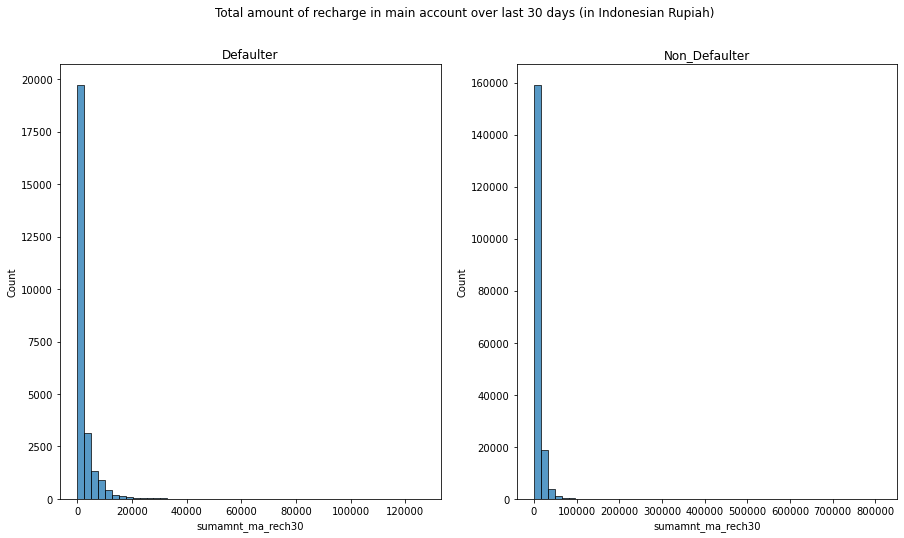

In [24]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)')
sns.histplot(ax = ax[0], x=defaulter.sumamnt_ma_rech30, bins=50)
ax[0].set_title("Defaulter")

sns.histplot(ax = ax[1], x=Non_defaulter.sumamnt_ma_rech30, bins=50)
ax[1].set_title("Non_Defaulter")

#sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

Text(0.5, 1.0, 'Non_Defaulter')

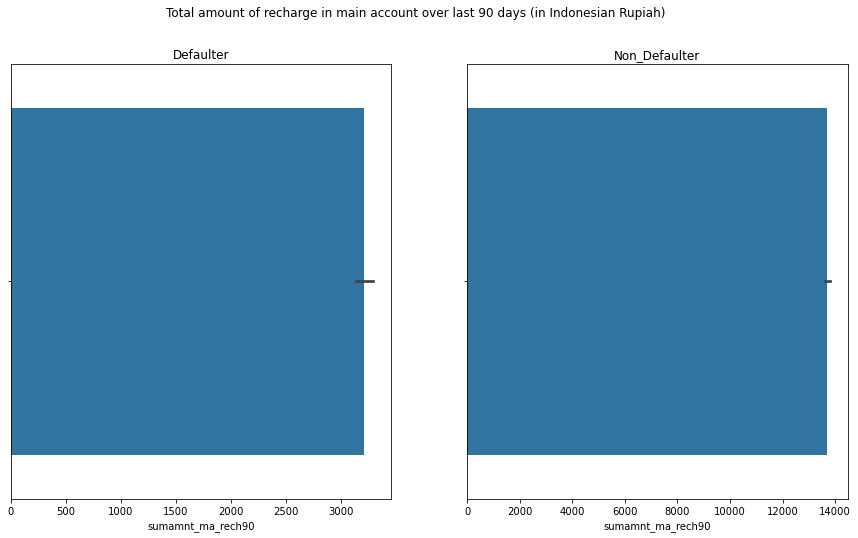

In [25]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('Total amount of recharge in main account over last 90 days (in Indonesian Rupiah)')
sns.barplot(ax = ax[0], x=defaulter.sumamnt_ma_rech90)
ax[0].set_title("Defaulter")

sns.barplot(ax = ax[1], x=Non_defaulter.sumamnt_ma_rech90)
ax[1].set_title("Non_Defaulter")

#sumamnt_ma_rech30: Total amount of recharge in main account over last 90 days (in Indonesian Rupiah)

In [26]:
print(defaulter.sumamnt_ma_rech30.median(),"/", defaulter.sumamnt_ma_rech90.median())

773.0 / 1539.0


In [27]:
print(Non_defaulter.sumamnt_ma_rech30.median(),"/", Non_defaulter.sumamnt_ma_rech90.median())

5498.0 / 8473.0


1) So the Defaulters tend to recharge their Main Account less when compared to Non_defaulters. This wouldn't be shocking, however, should be expected. As that would be the problem of particluar users using service do not recharge or payback the loan within 5 days.<br>
2) There are so many Defaulters who did not recharge their account even once, same goes with Non_defaulters, however, looking at the 90 day plot it is evident that most Defaulters do not recharge their account more.

In [28]:
df['amnt_loans30'].describe()

count    209593.000000
mean         17.952021
std          17.379741
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max         306.000000
Name: amnt_loans30, dtype: float64

Text(0.5, 1.0, 'Non_Defaulter')

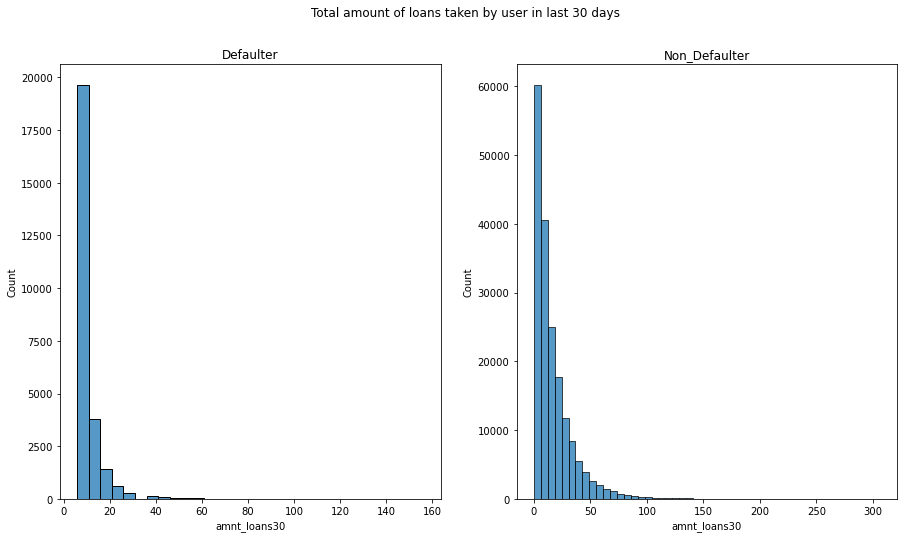

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('Total amount of loans taken by user in last 30 days')
sns.histplot(ax = ax[0], x=defaulter.amnt_loans30, bins=30)
ax[0].set_title("Defaulter")

sns.histplot(ax = ax[1], x=Non_defaulter.amnt_loans30, bins=50)
ax[1].set_title("Non_Defaulter")

#amnt_loans30: Total amount of loans taken by user in last 30 days

Text(0.5, 1.0, 'Non_Defaulter')

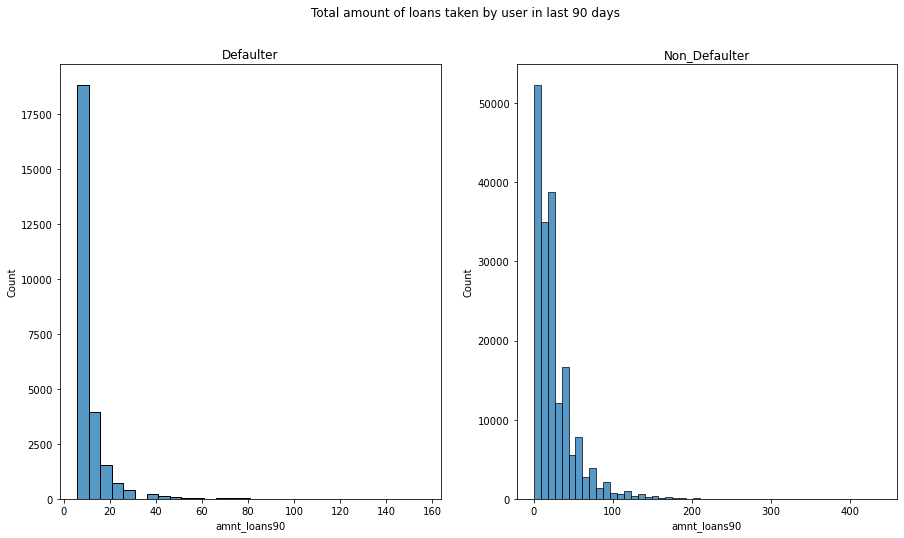

In [30]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('Total amount of loans taken by user in last 90 days')
sns.histplot(ax = ax[0], x=defaulter.amnt_loans90, bins=30)
ax[0].set_title("Defaulter")

sns.histplot(ax = ax[1], x=Non_defaulter.amnt_loans90, bins=50)
ax[1].set_title("Non_Defaulter")

#amnt_loans30: Total amount of loans taken by user in last 90 days

In [31]:
print(defaulter.amnt_loans30.median(),"/", defaulter.amnt_loans90.median())

6.0 / 6.0


In [32]:
print(Non_defaulter.amnt_loans90.median(),"/", Non_defaulter.amnt_loans90.median())

18.0 / 18.0


1) Users Defaulting do not take more loans than Non defaulting users. This might be because they can't pay back the amount for the previous loan.
2) **Non_defaulters took loan more often. So it is very important not to lose these customer.**

In [33]:
df['cnt_loans30'].describe()

count    209593.000000
mean          2.758981
std           2.554502
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          50.000000
Name: cnt_loans30, dtype: float64

Text(0.5, 1.0, 'Non_Defaulter')

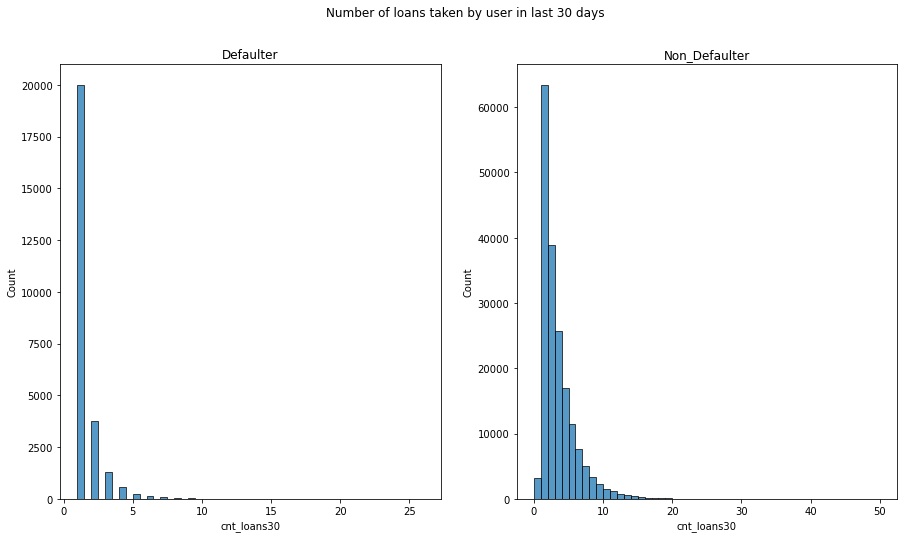

In [34]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('Number of loans taken by user in last 30 days')
sns.histplot(ax = ax[0], x=defaulter.cnt_loans30, bins=50)
ax[0].set_title("Defaulter")

sns.histplot(ax = ax[1], x=Non_defaulter.cnt_loans30, bins=50)
ax[1].set_title("Non_Defaulter")

#cnt_loans30: Number of loans taken by user in last 30 days

In [35]:
print(defaulter.cnt_loans30.median(),"/", Non_defaulter.cnt_loans30.median())

1.0 / 2.0


1) This implies the same, number of loans and the amount for the loan taken by defaulter is low.<br>
2) Non-defaulter has very less number of Users who did not take a loan in the past 30 Days, **this shows that the users are taking advantage of the service and this data suggest that the service is very helpful for the customers.**<br>
3) Defaulters have almost 26,000 users classified as Defaulters and 0 loans have been taken by almost 20,000 defaulting users.

In [36]:
df['daily_decr30'].describe()

count    209593.000000
mean       5381.431293
std        9220.606472
min           0.000000
25%          42.453000
50%        1469.175667
75%        7244.000000
max      265926.000000
Name: daily_decr30, dtype: float64

Text(0.5, 1.0, 'Non_Defaulter')

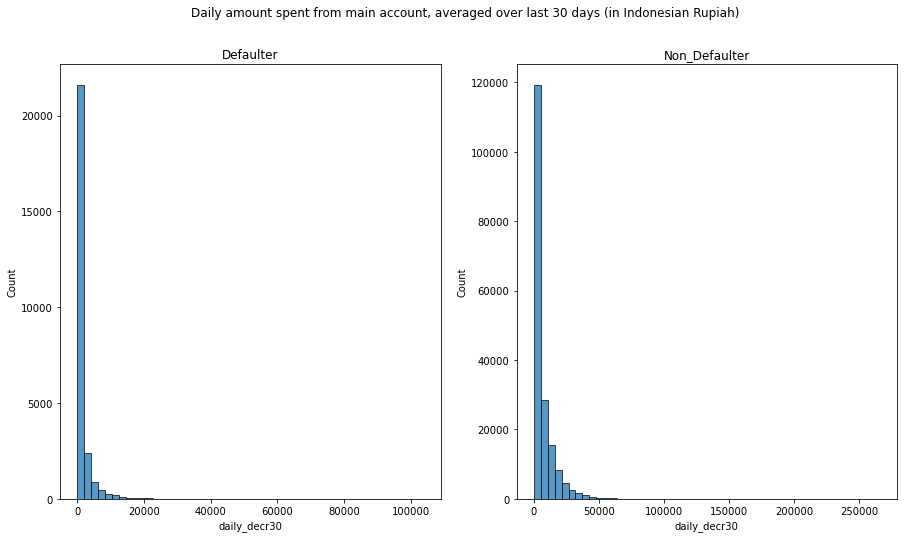

In [37]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)')
sns.histplot(ax = ax[0], x=defaulter.daily_decr30,bins=50)
ax[0].set_title("Defaulter")

sns.histplot(ax = ax[1], x=Non_defaulter.daily_decr30, bins=50)
ax[1].set_title("Non_Defaulter")

#daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

Text(0.5, 1.0, 'Non_Defaulter')

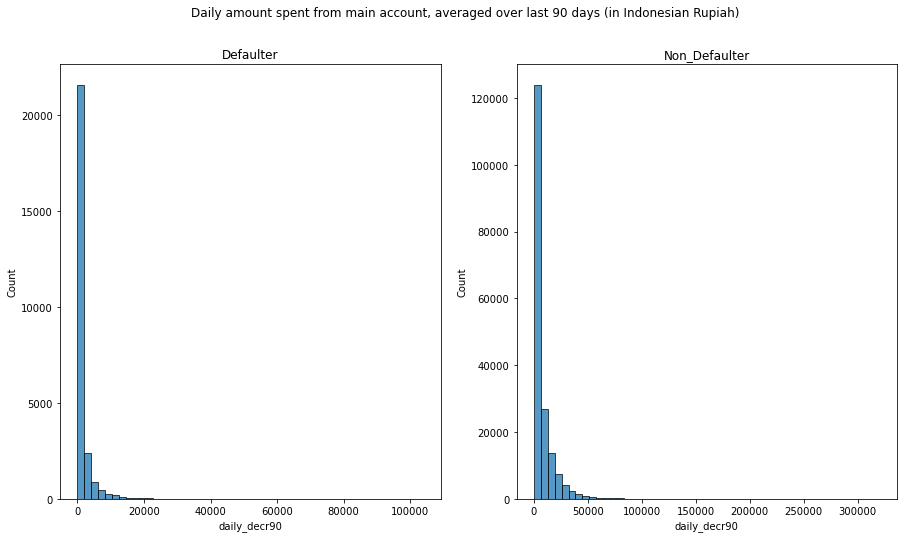

In [38]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)')
sns.histplot(ax = ax[0], x=defaulter.daily_decr90,bins=50)
ax[0].set_title("Defaulter")

sns.histplot(ax = ax[1], x=Non_defaulter.daily_decr90, bins=50)
ax[1].set_title("Non_Defaulter")

#daily_decr30: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

In [39]:
print(defaulter.daily_decr30.median(),"/", defaulter.daily_decr90.median())

33.447500000000005 / 35.195


In [40]:
print(Non_defaulter.daily_decr30.median(),"/", Non_defaulter.daily_decr90.median())

2127.695 / 2190.95


1) Defaulters do not spend amount in there Main Account There are 26,000+ users defaulting out of them more than 21,500+ users do not add or spend any amount. So, these events may be due to intent to default or not pay back the loan or their personal taste or user just do not want to pay back the amount.<br>
2) Same is with the Non_defaulters. More than or equal to 50% of Non_defaulters do not spend money on Main Account as well.

In [41]:
df['medianamnt_ma_rech30'].describe()

count    209593.000000
mean       1812.817952
std        2070.864620
min           0.000000
25%         770.000000
50%        1539.000000
75%        1924.000000
max       55000.000000
Name: medianamnt_ma_rech30, dtype: float64

Text(0.5, 1.0, 'Non_Defaulter')

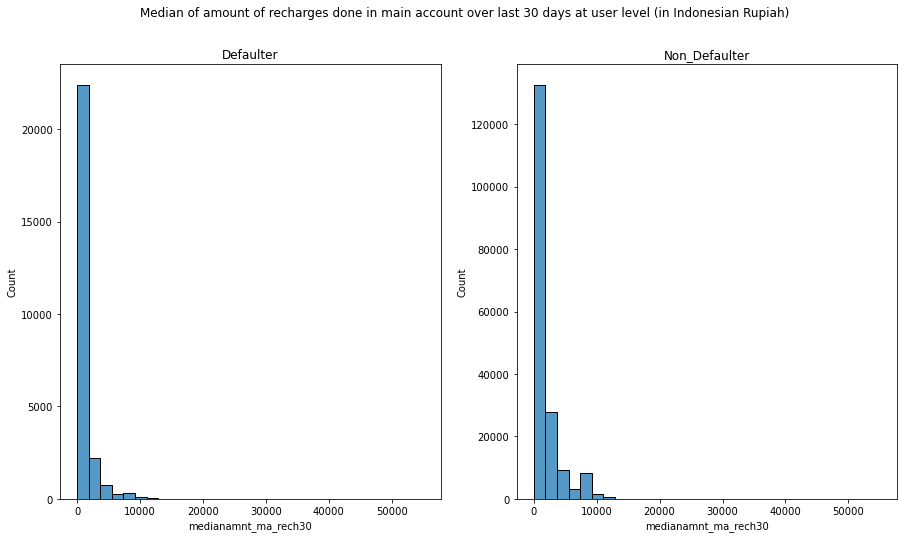

In [42]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)')
sns.histplot(ax = ax[0], x=defaulter.medianamnt_ma_rech30,bins=30)
ax[0].set_title("Defaulter")

sns.histplot(ax = ax[1], x=Non_defaulter.medianamnt_ma_rech30, bins=30)
ax[1].set_title("Non_Defaulter")

#medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

Text(0.5, 1.0, 'Non_Defaulter')

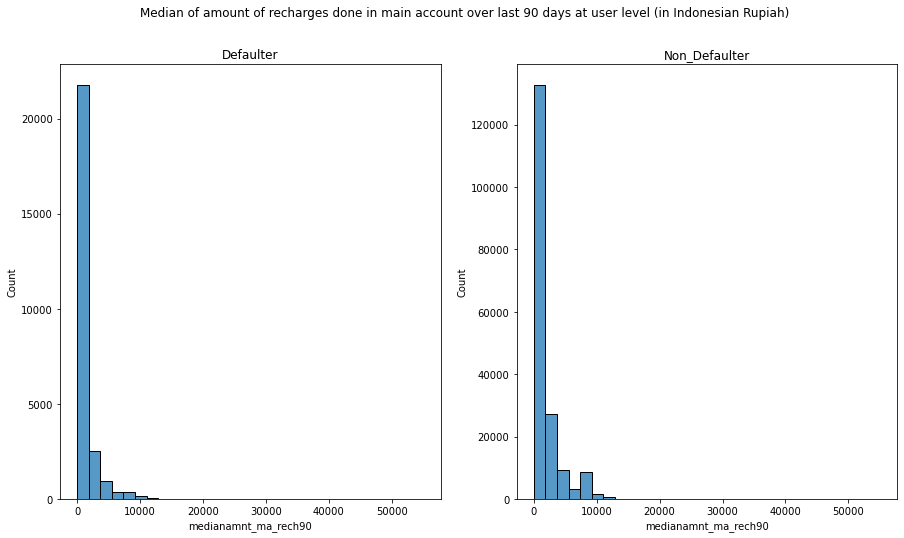

In [43]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('Median of amount of recharges done in main account over last 90 days at user level (in Indonesian Rupiah)')
sns.histplot(ax = ax[0], x=defaulter.medianamnt_ma_rech90,bins=30)
ax[0].set_title("Defaulter")

sns.histplot(ax = ax[1], x=Non_defaulter.medianamnt_ma_rech90, bins=30)
ax[1].set_title("Non_Defaulter")

#medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user level (in Indonesian Rupiah)

In [44]:
print(defaulter.medianamnt_ma_rech30.median(),"/", defaulter.medianamnt_ma_rech90.median())

770.0 / 773.0


In [45]:
print(Non_defaulter.medianamnt_ma_rech30.median(),"/", Non_defaulter.medianamnt_ma_rech90.median())

1539.0 / 1539.0


This column and plots show the same insights as the columns with show the amount spent on Main Account. 

In [46]:
df['fr_ma_rech90'].describe()

count    209593.000000
mean          7.716780
std          12.590251
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max          88.000000
Name: fr_ma_rech90, dtype: float64

Text(0.5, 1.0, 'Non_Defaulter')

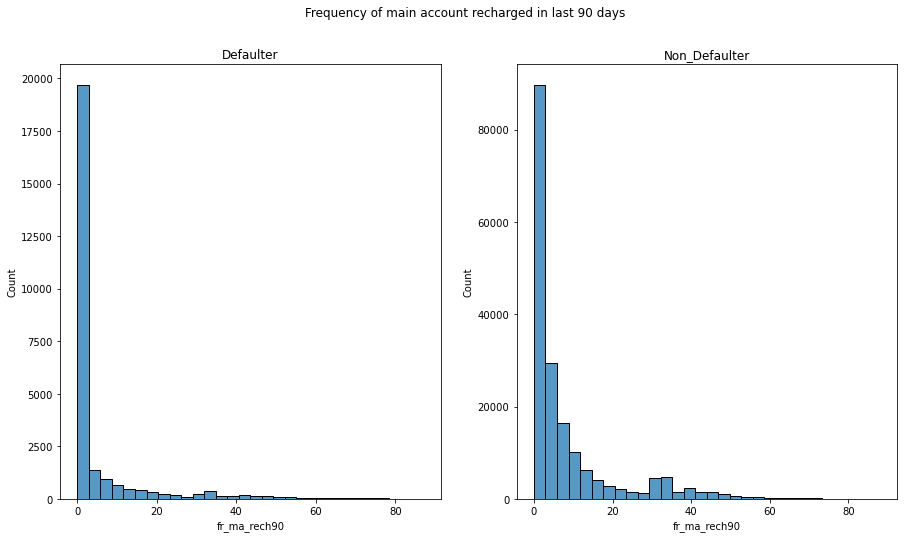

In [47]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('Frequency of main account recharged in last 90 days')
sns.histplot(ax = ax[0], x=defaulter.fr_ma_rech90,bins=30)
ax[0].set_title("Defaulter")

sns.histplot(ax = ax[1], x=Non_defaulter.fr_ma_rech90, bins=30)
ax[1].set_title("Non_Defaulter")

#fr_ma_rech90: Frequency of main account recharged in last 90 days

In [48]:
print(defaulter.fr_ma_rech90.median(),"/", defaulter.fr_ma_rech90.median())

0.0 / 0.0


In [49]:
print(Non_defaulter.fr_ma_rech90.median(),"/", Non_defaulter.fr_ma_rech90.median())

3.0 / 3.0


The frequency of the main account being recharged is some what better for Non_defaulters, however, this is also linked with Amount spent and recharges done. So same distribution as above plots.

# Observations

1) The number of times DATA ACCOUNT gets recharged is very low for the users defaulting when compared to Non defaulting users.<br>
2) The total Amount(value) of recharges for MAIN ACCOUNT is low for Defaulters than Non_defaulters.<br>
3) This implies the NUMBER OF LOAN IS TAKEN and the TOTAL AMOUNT OF LOANS TAKEN is less for Defaulters than Non_defaulters.<br>
4) There is a HUGE difference for DAILY AMOUNT SPENT (For 30 and 90) for Defaulter and Non_defaulters. Daily Amount spent is very low in case of Defaulters when compared to Non_defaulters

# Feature Engineering

Aim would be prepare a proper input dataset, compatible with the machine learning algorithm requirements so that in turn improves the performance of the algorithm

There are no NAN values. Columns "pcircle", "pdate","Unnamed: 0" and "msisdn" has already been removed along with other columns which has correlation very close to 0.

## Outliers and Skewness

Let's check the data distribution among all the columns

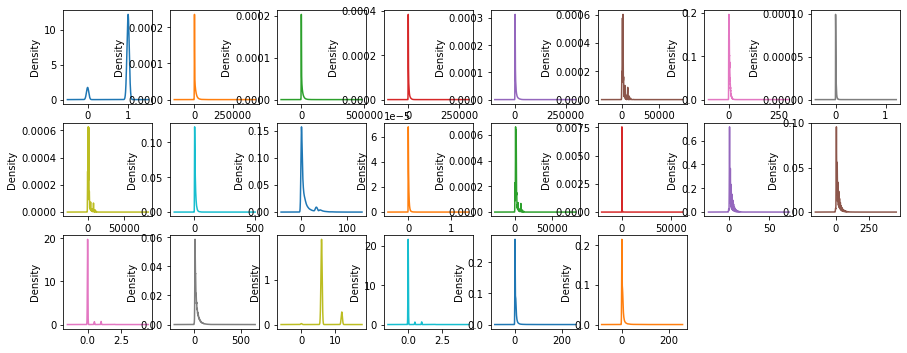

In [50]:
df.plot(kind="density", subplots =True, layout=(5,8), sharex=False, legend =False, figsize=(15,10))
plt.show()

So the data is highly skewed and we would need to handle Skewness

## Outliers in dataset

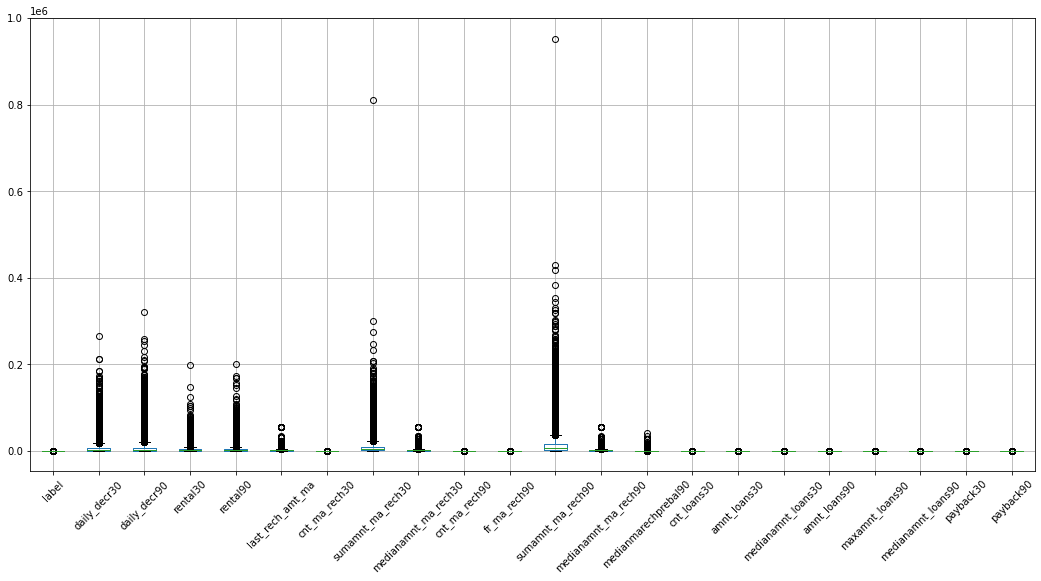

In [51]:
df.boxplot(figsize=(18,10))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

Total 11 Columns show huge number of **Outliers**. It is evident that if we remove outiers we are indirectly adjusting the distribution toward normal distribution and also treating skewness. <br>

In [52]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[2.64789583, 0.25230302, 0.27634926, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.73103486, 0.55337786, ..., 0.22959366, 0.38562959,
        0.41923266],
       [0.37765836, 0.43201505, 0.42903586, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.70078859, 0.53319244, ..., 0.22959366, 0.06820893,
        0.04735622],
       [0.37765836, 0.77075342, 0.59455649, ..., 0.22959366, 0.38562959,
        0.59938541],
       [0.37765836, 0.09674759, 0.14174894, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [53]:
Thresold = 3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([10, 10, 21, ..., 17, 16, 19], dtype=int64))


In [54]:
data = df[(z<3).all(axis=1)]

In [55]:
data.shape

(170471, 22)

In [56]:
df.shape

(209593, 22)

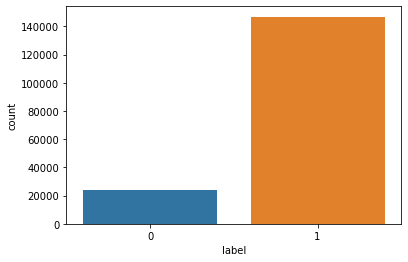

In [57]:
sns.countplot(data['label'])
plt.savefig('zscore_countplot.png')

In [58]:
defaulter_new = data[data['label']==0]
Non_defaulter_new = data[data['label']==1]
print(defaulter_new.shape,"   ", Non_defaulter_new.shape)

(23686, 22)     (146785, 22)


In [59]:
print(defaulter.shape,"   ", Non_defaulter.shape)

(26162, 37)     (183431, 37)


In [60]:
data.shape

(170471, 22)

Using zscore we can see a data loss of **18.66%**. We will try to use IQR method and see if we can reduce the data loss

# Handling Outlier and Transformation

In [61]:
#function for detecting outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*1.5)
    return(lower_bridge,upper_bridge)

In [62]:
#function for detecting outliers when feature has huge skewness (by IQR)

def outlier_IQR3(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*3)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
    return(lower_bridge,upper_bridge)

In [63]:
#function for detecting outliers when feature has Normally Distributed (by mean-+3dtf)

def outlier_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return(lower_boundary,upper_boundary)

In [64]:
#function for checking data is Normally Distributed by QQ-plot.

from scipy import stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name], dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("Original_dist")
    plt.show()

In [65]:
#function for LOG transformation Technique

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")
        plt.show()

In [66]:
#function for Reciprocal transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name] 
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")
        plt.show()

In [67]:
#function for Square root transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")
        plt.show()

In [68]:
#function for Exponential transformation Technique

def exponential_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/1.2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("exponential_transform")
        plt.show()

In [69]:
#function for Box cox transformation Technique

def boxcox_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = stats.boxcox(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("boxcox_transform")
        plt.show()

In [70]:
def log1p_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    data_frame_copy[feature_name] = np.log1p(data_frame_copy[feature_name])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame_copy[feature_name].hist()
    plt.title("log1p_transform")
    plt.show()

In [71]:
corr_relation = df.corr()
corr_relation['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168293
daily_decr90            0.166146
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.076033
rental30                0.058645
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.037126
medianamnt_loans90      0.035747
Name: label, dtype: float64

# Outlier and skewness transformation.
## Column cnt_ma_rech30 

In [72]:
dummy = df.copy()

In [73]:
dummy.shape

(209593, 22)

In [74]:
dummy.columns

Index(['label', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'medianamnt_loans30', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [75]:
dummy['cnt_ma_rech30'].describe()

count    209593.000000
mean          3.978057
std           4.256090
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max         203.000000
Name: cnt_ma_rech30, dtype: float64

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='Density'>

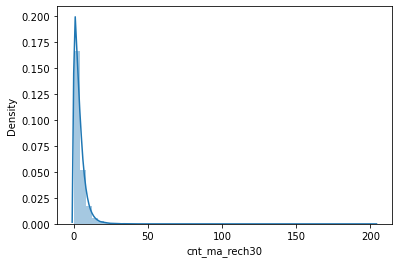

In [76]:
sns.distplot(dummy['cnt_ma_rech30'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed455caaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed455d81f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed455ca790>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed455d88b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed455d8c10>],
 'means': []}

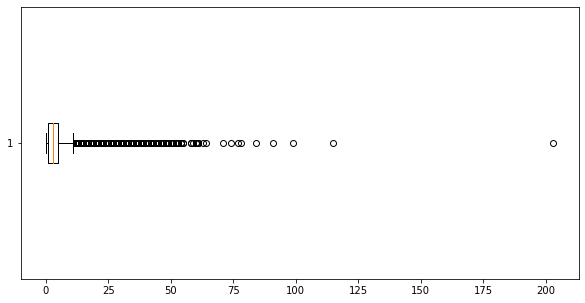

In [77]:
plt.figure(figsize=(10,5))
plt.boxplot(dummy['cnt_ma_rech30'], vert=False)

In [78]:
outlier_IQR3(dummy,'cnt_ma_rech30')

(-11.0, 17.0)

In [79]:
dummy[dummy['cnt_ma_rech30']>17].shape

(3117, 22)

In [80]:
dummy = dummy[dummy['cnt_ma_rech30']<=17]

In [81]:
dummy.shape

(206476, 22)

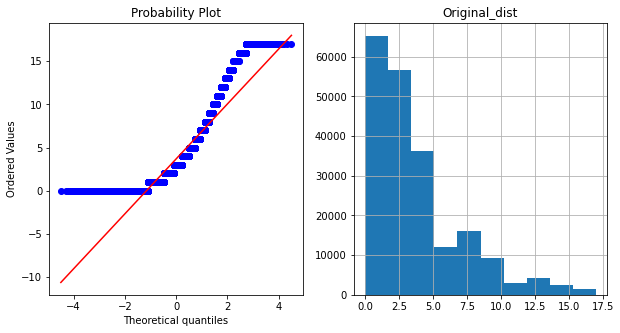

In [82]:
original_dist(dummy,'cnt_ma_rech30')

In [83]:
log_transform(dummy,'cnt_ma_rech30')

reciprocal_transform(dummy,'cnt_ma_rech30')

squareroot_transform(dummy,'cnt_ma_rech30')

exponential_transform(dummy,'cnt_ma_rech30')

boxcox_transform(dummy,'cnt_ma_rech30')

There are 0 values in the column so let's try log1p

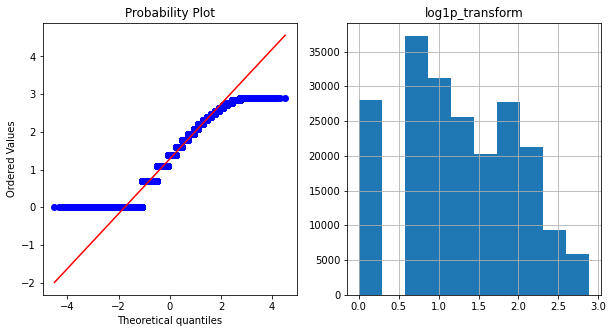

In [84]:
log1p_transform(dummy,'cnt_ma_rech30')

In [85]:
dummy['cnt_ma_rech30'] = np.log1p(dummy['cnt_ma_rech30'])
dummy['cnt_ma_rech30'].skew()

-0.1352160140886498

Treated Outliers and skewness

## Column cnt_ma_rech90

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='Density'>

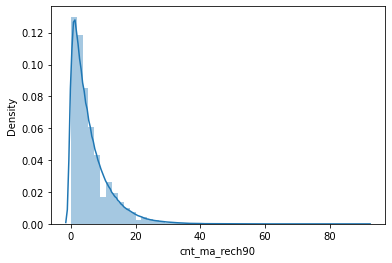

In [86]:
sns.distplot(dummy['cnt_ma_rech90'])

In [87]:
dummy['cnt_ma_rech90'].describe()

count    206476.000000
mean          5.878441
std           5.995909
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max          91.000000
Name: cnt_ma_rech90, dtype: float64

There are lots of outliers as the max and 75th percentile have huge difference.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed64f9aac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed64fa61c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed64f9a760>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed64fa6880>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed64fa6be0>],
 'means': []}

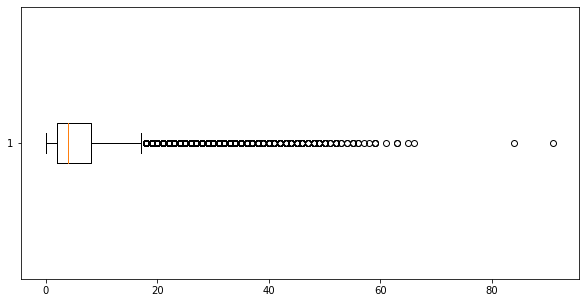

In [88]:
plt.figure(figsize=(10,5))
plt.boxplot(dummy['cnt_ma_rech90'], vert=False)

In [89]:
outlier_IQR3(dummy,'cnt_ma_rech90')

(-16.0, 26.0)

In [90]:
dummy[dummy['cnt_ma_rech90']>26.0].shape

(2429, 22)

In [91]:
dummy = dummy[dummy['cnt_ma_rech90']<=26.0]

In [92]:
dummy.shape

(204047, 22)

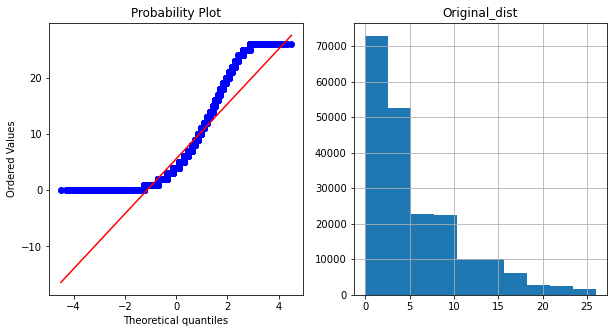

In [93]:
original_dist(dummy,'cnt_ma_rech90')

In [94]:
log_transform(dummy,'cnt_ma_rech30')

reciprocal_transform(dummy,'cnt_ma_rech30')

squareroot_transform(dummy,'cnt_ma_rech30')

exponential_transform(dummy,'cnt_ma_rech30')

boxcox_transform(dummy,'cnt_ma_rech30')

There are 0 values in the column so let's try log1p

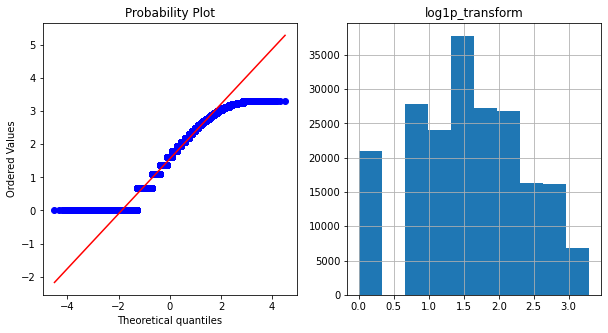

In [95]:
log1p_transform(dummy,'cnt_ma_rech90')

In [96]:
dummy['cnt_ma_rech90'] = np.log1p(dummy['cnt_ma_rech90'])
dummy['cnt_ma_rech90'].skew()

-0.18917699917167785

Treated Outliers and skewness

## Column sumamnt_ma_rech90

<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='Density'>

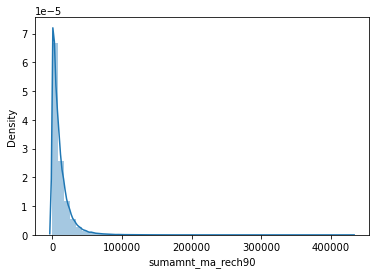

In [97]:
sns.distplot(dummy['sumamnt_ma_rech90'])

In [98]:
dummy['sumamnt_ma_rech90'].describe()

count    204047.000000
mean      11294.942155
std       14372.051856
min           0.000000
25%        2312.000000
50%        6942.000000
75%       15031.000000
max      429256.000000
Name: sumamnt_ma_rech90, dtype: float64

There are lots of outliers as the max and 75th percentile have huge difference.

In [99]:
outlier_IQR3(dummy,'sumamnt_ma_rech90')

(-35845.0, 53188.0)

In [100]:
dummy[dummy['sumamnt_ma_rech90']>53188.0].shape

(4188, 22)

In [101]:
dummy = dummy[dummy['sumamnt_ma_rech90']<=53188.0]

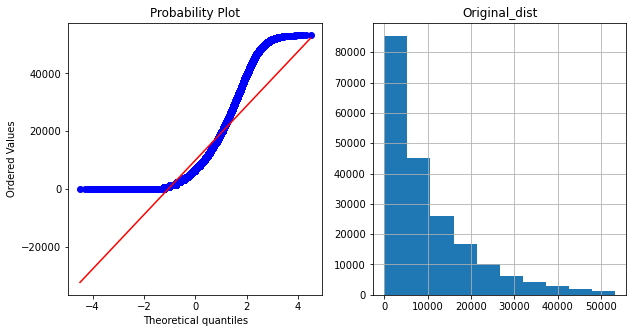

In [102]:
original_dist(dummy,'sumamnt_ma_rech90')

There are 0 values in the column so let's try log1p

In [103]:
dummy['sumamnt_ma_rech90'].skew()

1.5423408231028857

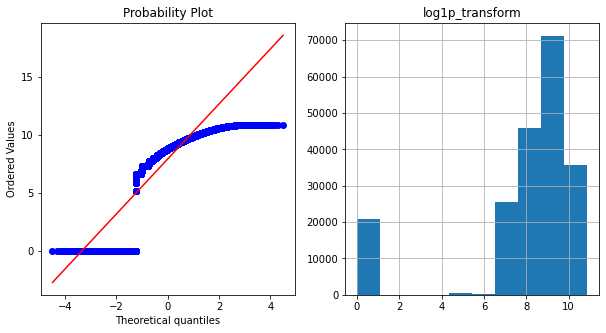

In [104]:
log1p_transform(dummy,'sumamnt_ma_rech90')

In [105]:
np.log1p(dummy['sumamnt_ma_rech90']).skew()

-2.0381120956897174

## Column sumamnt_ma_rech30

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='Density'>

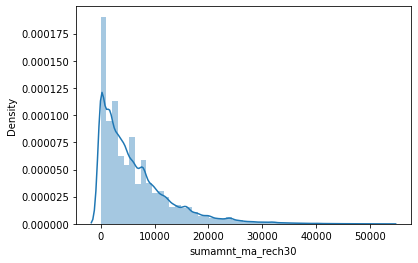

In [106]:
sns.distplot(dummy['sumamnt_ma_rech30'])

In [107]:
df['sumamnt_ma_rech30'].describe()

count    209593.000000
mean       7704.501157
std       10139.621714
min           0.000000
25%        1540.000000
50%        4628.000000
75%       10010.000000
max      810096.000000
Name: sumamnt_ma_rech30, dtype: float64

In [108]:
outlier_IQR3(dummy,'sumamnt_ma_rech90')

(-33513.0, 50074.0)

In [109]:
dummy[dummy['sumamnt_ma_rech30']>50074.0].shape

(21, 22)

In [110]:
dummy = dummy[dummy['sumamnt_ma_rech30']<=50074.0]

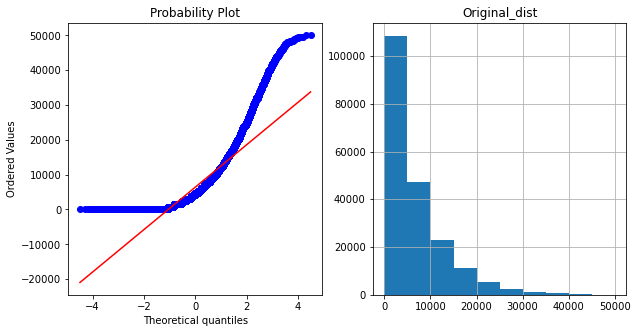

In [111]:
original_dist(dummy,'sumamnt_ma_rech30')

There are 0 values in the column so let's try log1p

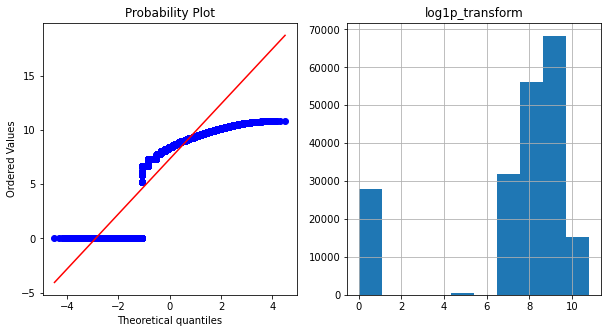

In [112]:
log1p_transform(dummy,'sumamnt_ma_rech30')

In [113]:
np.log1p(dummy['sumamnt_ma_rech30']).skew()

-1.745616376576896

In [114]:
dummy['sumamnt_ma_rech30'].skew()

1.807734277568228

## Column amnt_loans90

<AxesSubplot:xlabel='amnt_loans90', ylabel='Density'>

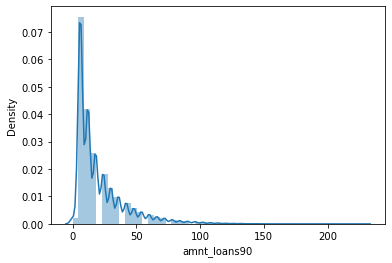

In [115]:
sns.distplot(dummy['amnt_loans90'])

In [116]:
dummy['amnt_loans90'].describe()

count    199838.000000
mean         20.975110
std          20.502709
min           0.000000
25%           6.000000
50%          12.000000
75%          30.000000
max         228.000000
Name: amnt_loans90, dtype: float64

In [117]:
outlier_IQR3(dummy,'amnt_loans90')

(-66.0, 102.0)

In [118]:
dummy[dummy['amnt_loans90']>102.0].shape

(1412, 22)

In [119]:
dummy = dummy[dummy['amnt_loans90']<=102.0]

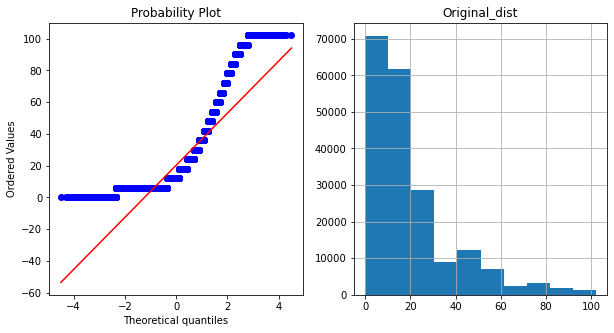

In [120]:
original_dist(dummy, 'amnt_loans90')

There are 0 values in the column so let's try log1p

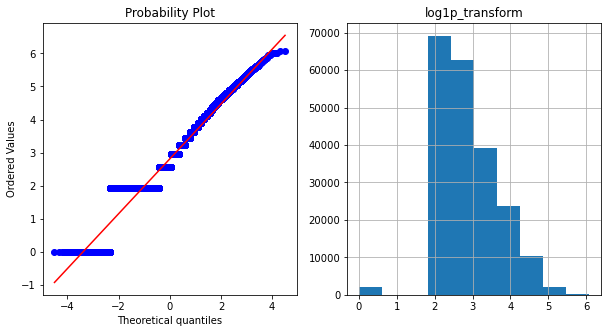

In [121]:
log1p_transform(df, 'amnt_loans90')

In [122]:
dummy['amnt_loans90'].skew()

1.7736821888128098

In [123]:
np.log1p(dummy['amnt_loans90']).skew()

0.08870235552035985

In [124]:
dummy['amnt_loans90']= np.log1p(dummy['amnt_loans90'])
dummy['amnt_loans90'].skew()

0.08870235552035985

Treated outlier and skewness

## Column amnt_loans30

<AxesSubplot:xlabel='amnt_loans30', ylabel='Density'>

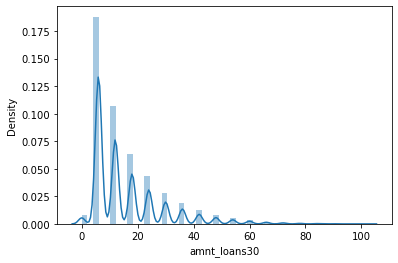

In [125]:
sns.distplot(dummy['amnt_loans30'])

In [126]:
dummy['amnt_loans30'].describe()

count    198426.000000
mean         15.973421
std          13.089296
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max         102.000000
Name: amnt_loans30, dtype: float64

In [127]:
outlier_IQR3(dummy,'amnt_loans30')

(-48.0, 78.0)

In [128]:
dummy[dummy['amnt_loans30']>78.0].shape

(267, 22)

In [129]:
dummy = dummy[dummy['amnt_loans90']<=78.0]

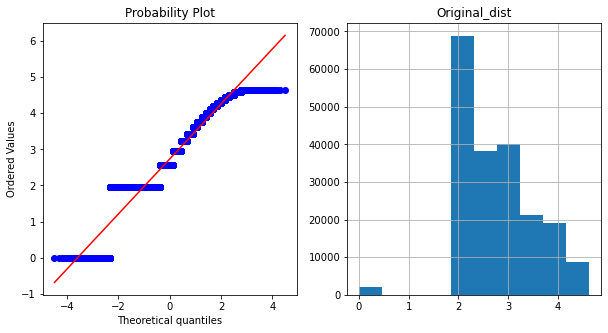

In [130]:
original_dist(dummy, 'amnt_loans90')

There are 0 values in the column so let's try log1p

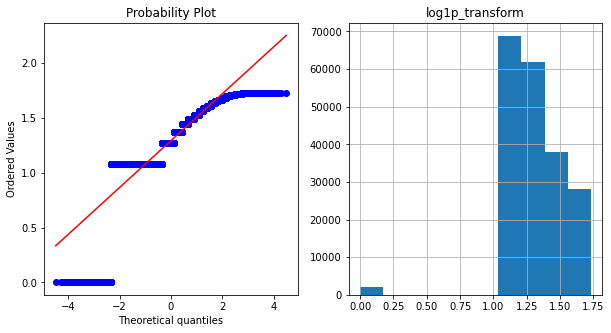

In [131]:
log1p_transform(dummy,'amnt_loans90')

In [132]:
dummy['amnt_loans90'].skew()

0.08870235552035985

Treated outliers and Skewness already in line 

## Column cnt_loans30


<AxesSubplot:xlabel='cnt_loans30', ylabel='Density'>

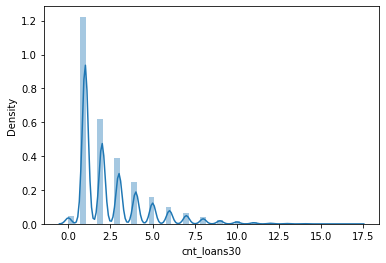

In [133]:
sns.distplot(dummy['cnt_loans30'])

In [134]:
dummy['cnt_loans30'].describe()

count    198426.000000
mean          2.498856
std           2.024843
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          17.000000
Name: cnt_loans30, dtype: float64

In [135]:
outlier_IQR3(dummy,'cnt_loans30')

(-5.0, 9.0)

In [136]:
dummy[dummy['cnt_loans30']>9.0].shape

(2226, 22)

In [137]:
dummy = dummy[dummy['cnt_loans30']<=9.0]

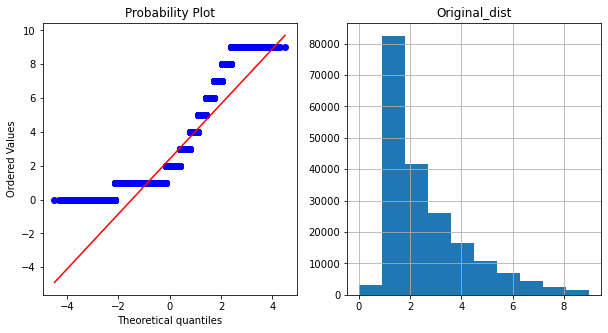

In [138]:
original_dist(dummy, 'cnt_loans30')

There are 0 values in the column so let's try log1p

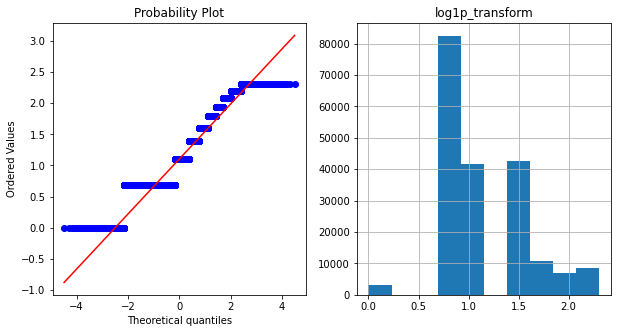

In [139]:
log1p_transform(dummy,'cnt_loans30')

In [140]:
dummy['cnt_loans30'].skew()

1.416101405035853

In [141]:
np.log1p(dummy['cnt_loans30']).skew()

0.5042138309613692

In [142]:
dummy['cnt_loans30'] = np.log1p(dummy['cnt_loans30'])
dummy['cnt_loans30'].skew()

0.5042138309613692

Treated Outlier and skewness

## Column daily_decr30


<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

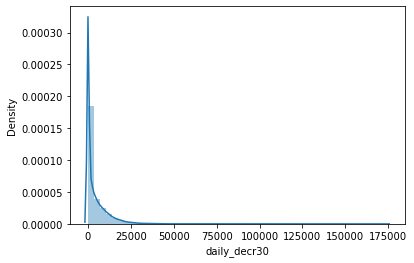

In [143]:
sns.distplot(dummy['daily_decr30'])

In [144]:
dummy['daily_decr30'].describe()

count    196200.000000
mean       4189.811966
std        6537.687668
min           0.000000
25%          37.257083
50%        1118.996667
75%        6051.332833
max      173834.000000
Name: daily_decr30, dtype: float64

In [145]:
outlier_IQR3(dummy,'daily_decr30')

(-18004.970166666662, 24093.56008333333)

In [146]:
dummy[dummy['daily_decr30']>24093.56008333333].shape

(3739, 22)

In [147]:
dummy = dummy[dummy['daily_decr30']<=24093.56008333333]

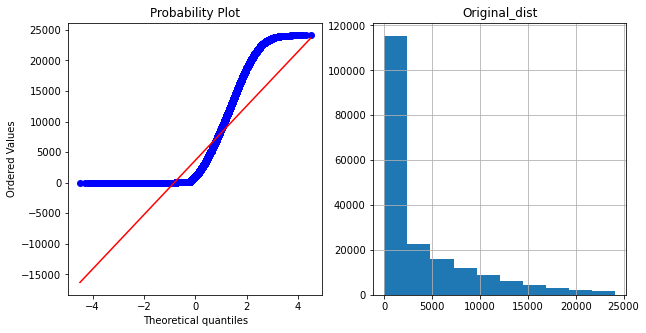

In [148]:
original_dist(dummy, 'daily_decr30')

There are 0 values in the column so let's try log1p

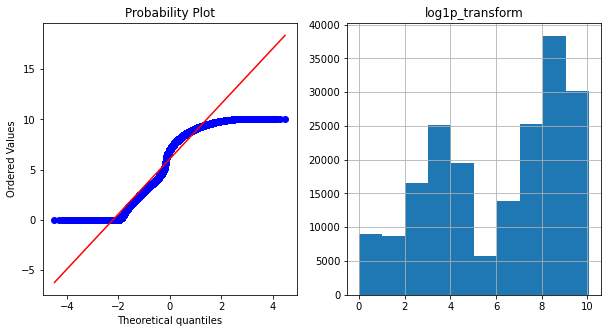

In [149]:
log1p_transform(dummy,'daily_decr30')

In [150]:
dummy['daily_decr30'].skew()

1.6610646726436475

In [151]:
np.log1p(dummy['daily_decr30']).skew()

-0.40588227475044236

In [152]:
dummy['daily_decr30']= np.log1p(dummy['daily_decr30'])
dummy['daily_decr30'].skew()

-0.40588227475044236

Treated Outliers and skewness

## Column daily_decr90


<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

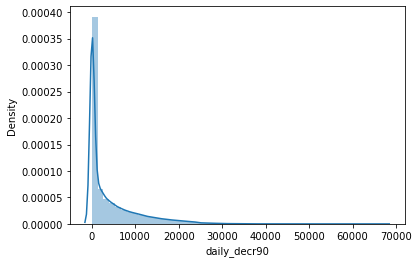

In [153]:
sns.distplot(dummy['daily_decr90'])

In [154]:
dummy['daily_decr90'].describe()

count    192461.000000
mean       4051.849009
std        5989.263045
min           0.000000
25%          36.244000
50%        1020.850000
75%        6004.980000
max       66856.920000
Name: daily_decr90, dtype: float64

In [155]:
outlier_IQR3(dummy,'daily_decr90')

(-17869.964, 23911.188)

In [156]:
dummy[dummy['daily_decr90']>23911.188].shape

(2335, 22)

In [157]:
dummy = dummy[dummy['daily_decr90']<=22810.27475000001]

In [158]:
dummy.shape

(189272, 22)

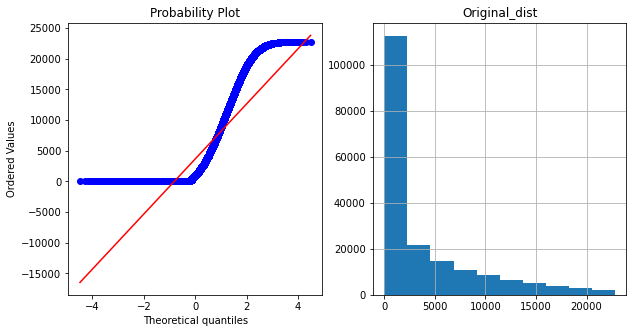

In [159]:
original_dist(dummy, 'daily_decr90')

There are 0 values in the column so let's try log1p

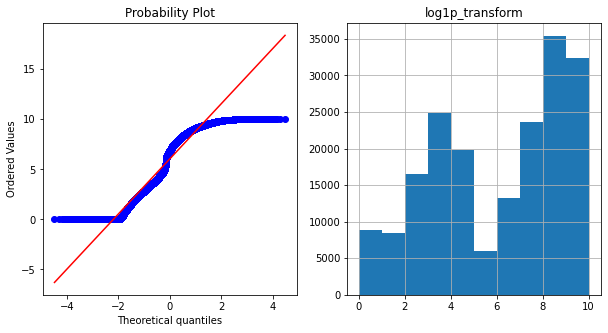

In [160]:
log1p_transform(dummy,'daily_decr90')

In [161]:
dummy['daily_decr90'].skew()

1.6208719087110872

In [162]:
np.log1p(dummy['daily_decr90']).skew()

-0.3779668098998347

In [163]:
dummy['daily_decr90'] = np.log1p(dummy['daily_decr90'])
dummy['daily_decr90'].skew()

-0.3779668098998347

Treated outliers and skewness

## Column medianamnt_ma_rech30


<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='Density'>

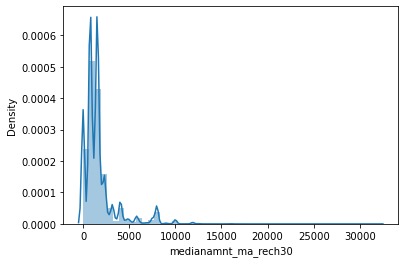

In [164]:
sns.distplot(dummy['medianamnt_ma_rech30'])

In [165]:
dummy['medianamnt_ma_rech30'].describe()

count    189272.000000
mean       1674.637271
std        1854.954518
min           0.000000
25%         770.000000
50%        1539.000000
75%        1547.000000
max       32000.000000
Name: medianamnt_ma_rech30, dtype: float64

In [166]:
outlier_IQR3(dummy,'medianamnt_ma_rech30')

(-1561.0, 3878.0)

In [167]:
dummy[dummy['medianamnt_ma_rech30']>3878.0].shape

(18713, 22)

This accounts to more number of outliers in this columns, we cannot appreciate that much data loss. We will try to reduce the number of rows we will lose.

In [168]:
dummy[dummy['medianamnt_ma_rech30']>9000.0].shape

(1684, 22)

In [169]:
#dummy = dummy[dummy['medianamnt_ma_rech30']<=3878.0]

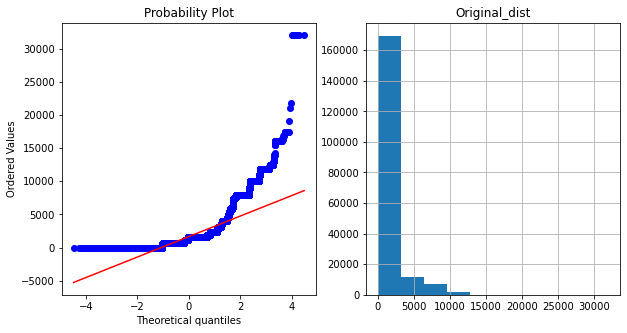

In [170]:
original_dist(dummy, 'medianamnt_ma_rech30')

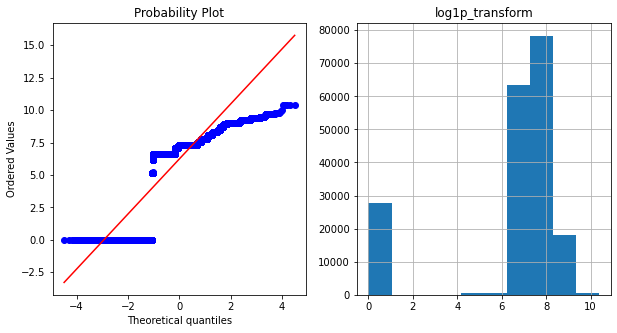

In [171]:
log1p_transform(dummy,'medianamnt_ma_rech30')

In [172]:
dummy['medianamnt_ma_rech30'].skew()

2.767618520300644

In [173]:
np.log1p(dummy['medianamnt_ma_rech30']).skew()

-1.75702144382427

## Column medianamnt_ma_rech90


<AxesSubplot:xlabel='medianamnt_ma_rech90', ylabel='Density'>

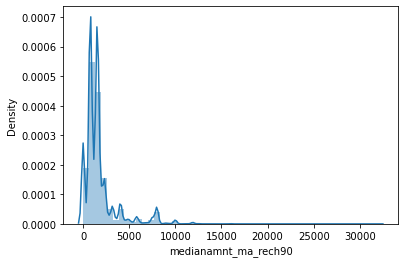

In [174]:
sns.distplot(dummy['medianamnt_ma_rech90'])

In [175]:
dummy['medianamnt_ma_rech90'].describe()

count    189272.000000
mean       1740.478930
std        1877.537099
min           0.000000
25%         771.500000
50%        1539.000000
75%        1720.000000
max       32000.000000
Name: medianamnt_ma_rech90, dtype: float64

In [176]:
outlier_IQR3(dummy,'medianamnt_ma_rech90')

(-2074.0, 4565.5)

In [177]:
dummy[dummy['medianamnt_ma_rech90']>4565.5].shape

(13156, 22)

That is  a very huge amount of outliers. 

## Column last_rech_amt_ma

<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='Density'>

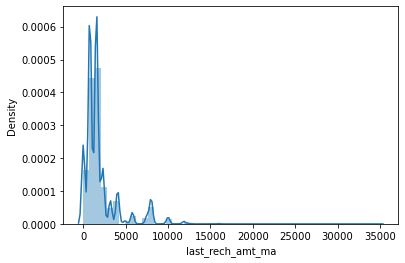

In [178]:
sns.distplot(dummy['last_rech_amt_ma'])

In [179]:
dummy['last_rech_amt_ma'].describe()

count    189272.000000
mean       1919.136190
std        2129.266635
min           0.000000
25%         770.000000
50%        1539.000000
75%        1924.000000
max       34783.000000
Name: last_rech_amt_ma, dtype: float64

In [180]:
outlier_IQR3(dummy,'last_rech_amt_ma')

(-2692.0, 5386.0)

In [181]:
dummy[dummy['last_rech_amt_ma']>5386.0].shape

(15319, 22)

Same in case of this column

## Column fr_ma_rech90

<AxesSubplot:xlabel='fr_ma_rech90', ylabel='Density'>

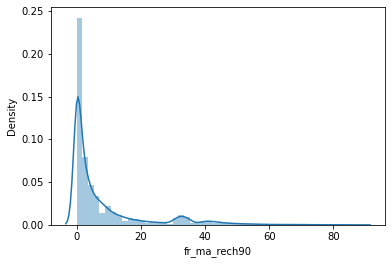

In [182]:
sns.distplot(dummy['fr_ma_rech90'])

In [183]:
dummy['fr_ma_rech90'].describe()

count    189272.000000
mean          8.177776
std          13.029904
min           0.000000
25%           0.000000
50%           2.000000
75%           9.000000
max          88.000000
Name: fr_ma_rech90, dtype: float64

In [184]:
outlier_IQR3(dummy,'fr_ma_rech90')

(-27.0, 36.0)

In [185]:
dummy['fr_ma_rech90'].unique()

array([21,  0,  2,  3,  1,  5, 30, 10, 26,  8, 31, 64, 66, 12, 32, 15,  7,
       18,  4,  9, 57, 50, 67, 11,  6, 44, 41, 45, 35, 40, 33, 34, 37, 22,
       23, 17, 36, 42, 25, 20, 13, 14, 47, 46, 51, 16, 39, 48, 59, 24, 38,
       19, 55, 62, 52, 65, 29, 74, 28, 71, 54, 56, 60, 43, 49, 27, 70, 53,
       73, 78, 68, 58, 79, 69, 61, 72, 85, 77, 75, 80, 63, 86, 83, 76, 88,
       82, 84, 81, 87], dtype=int64)

In [186]:
dummy[dummy['fr_ma_rech90']>36.0].shape

(10504, 22)

Same in case of this column

## Column maxamnt_loans90

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='Density'>

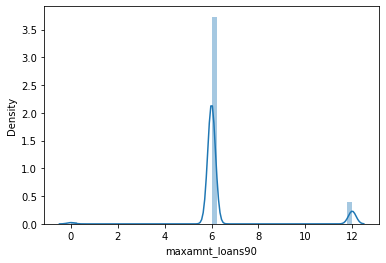

In [187]:
sns.distplot(dummy['maxamnt_loans90'])

In [188]:
dummy['maxamnt_loans90'].describe()

count    189272.000000
mean          6.511898
std           1.872504
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max          12.000000
Name: maxamnt_loans90, dtype: float64

In [189]:
dummy['maxamnt_loans90'].unique()

array([ 6, 12,  0], dtype=int64)

In [190]:
outlier_IQR3(dummy,'maxamnt_loans90')

(6.0, 6.0)

In [191]:
dummy[dummy['maxamnt_loans90']>6.0].shape

(17980, 22)

Same in case of this column

**I will use the zscore for this problem as it gives the same results with low data loss than IQR method.**

In [192]:
data.shape

(170471, 22)

In [193]:
x = data.drop('label', axis=1)
y= data['label']

In [194]:
x.shape

(170471, 21)

In [195]:
y.shape

(170471,)

In [196]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

In [197]:
df_new.skew()

daily_decr30           -0.112967
daily_decr90           -0.104718
rental30               -0.066843
rental90               -0.070967
last_rech_amt_ma       -0.184764
cnt_ma_rech30          -0.026798
sumamnt_ma_rech30      -0.457501
medianamnt_ma_rech30   -0.312201
cnt_ma_rech90          -0.030302
fr_ma_rech90            0.141734
sumamnt_ma_rech90      -0.365364
medianamnt_ma_rech90   -0.174327
medianmarechprebal90   -0.028135
cnt_loans30             0.086826
amnt_loans30           -0.003026
medianamnt_loans30      5.349169
amnt_loans90            0.122399
maxamnt_loans90         2.671598
medianamnt_loans90      6.101769
payback30               0.305693
payback90               0.207638
dtype: float64

In [198]:
df_new.shape

(170471, 21)

Only 1 iteration of power transform is transforming our data to normality. Let's look into the columns medianamnt_loans30, medianamnt_loans90 and maxamnt_loans90 columns have skewness lets look if the columns are categorical in nature.

In [199]:
data['medianamnt_loans30'].unique()

array([0. , 0.5])

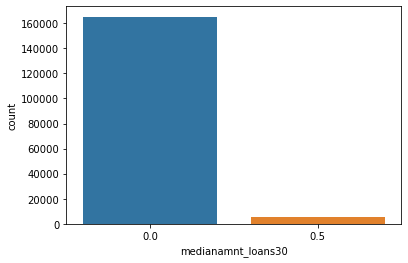

In [200]:
sns.countplot(data['medianamnt_loans30'])
plt.savefig("median_loan30_categ.png")

In [201]:
data['medianamnt_loans90'].unique()

array([0. , 0.5])

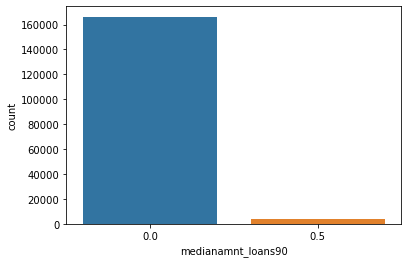

In [202]:
sns.countplot(data['medianamnt_loans90'])
plt.savefig("median_loan90_categ.png")

In [203]:
data['maxamnt_loans90'].unique()

array([ 6, 12], dtype=int64)

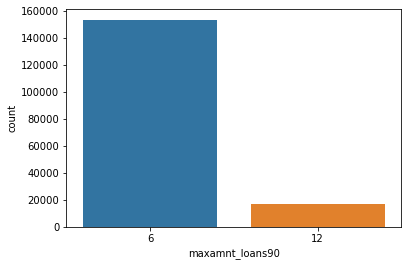

In [204]:
sns.countplot(data['maxamnt_loans90'])
plt.savefig("maxamnt_loans90_categ.png")

Yes they are. So we can move forward with the above data.

Now we would need to deal with data imbalance problem.

In [205]:
x = df_new

In [206]:
x.shape

(170471, 21)

In [207]:
y.shape

(170471,)

In [208]:
joined = x.join(y)

In [209]:
joined.shape

(170471, 22)

# Method1:  UnderSampling.

In [210]:
default = joined[joined['label']==0]
non_default = joined[joined['label']==1]

In [211]:
default.shape

(19163, 22)

In [212]:
non_default.shape

(119390, 22)

We would want 19163 samples from non_default users

In [213]:
Under_sample = non_default.sample(19163)

In [214]:
test_under = pd.concat([Under_sample, default], axis=0)

In [215]:
test_under.shape

(38326, 22)

In [216]:
test_under['label'].value_counts()

0.0    19163
1.0    19163
Name: label, dtype: int64

We have created a new DataFrame with same amount of defaulters and Non_defaulters.

In [217]:
x1 = test_under.drop('label', axis=1)
y1 = test_under['label']

## Finding the best random state for the model


In [218]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

We have imported all the algorithms and will find the best random state for our model and move towards testing different algorithms. We will use 

In [220]:
maxAccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.20,random_state=i)
    lr = DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.516044873467258 on random state 39


**This shows that the accuracy is not more than 51.579%, I will try other techniques.**

# Method 2: OverSampling

In [221]:
default.shape

(19163, 22)

In [222]:
non_default.shape

(119390, 22)

In [223]:
over_sample = default.sample(119390, replace=True)

Copying default till we get 119390 rows.

In [224]:
over_sample.shape

(119390, 22)

In [225]:
test_over = pd.concat([non_default, over_sample], axis=0)

In [226]:
test_over.shape

(238780, 22)

In [227]:
test_over['label'].value_counts()

0.0    119390
1.0    119390
Name: label, dtype: int64

In [228]:
x2 = test_over.drop('label', axis=1)
y2 = test_over['label']

In [229]:
maxAccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.20,random_state=i)
    lr = DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.5144795199582572 on random state 25


**Same with this method, we will try SMOTE.**

# Method 3: SMOTE

In [230]:
from imblearn.over_sampling import SMOTE

In [231]:
y.value_counts()

1    146785
0     23686
Name: label, dtype: int64

In [232]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_sample(x,y)

y_sm.value_counts()

1    146785
0    146785
Name: label, dtype: int64

In [235]:
maxAccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.20,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.763667949722383 on random state 22


Awesome! Using Smote we have a drastic change in Accuracy. Lets move forward with this method and check f1_score as well for different algorithms. Best random state is **22**.

# **Model Creation**


In [236]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.20,random_state=22)

## Creating train_test_split

Now we will try out every model and look at the metrics.

In [237]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.763667949722383
[[22675  6625]
 [ 7251 22163]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77     29300
           1       0.77      0.75      0.76     29414

    accuracy                           0.76     58714
   macro avg       0.76      0.76      0.76     58714
weighted avg       0.76      0.76      0.76     58714



In [238]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8835712095922608
[[26294  3006]
 [ 3830 25584]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     29300
           1       0.89      0.87      0.88     29414

    accuracy                           0.88     58714
   macro avg       0.88      0.88      0.88     58714
weighted avg       0.88      0.88      0.88     58714



In [239]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.933559287393126
[[27405  1895]
 [ 2006 27408]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     29300
           1       0.94      0.93      0.93     29414

    accuracy                           0.93     58714
   macro avg       0.93      0.93      0.93     58714
weighted avg       0.93      0.93      0.93     58714



In [240]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8103689069046565
[[24144  5156]
 [ 5978 23436]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     29300
           1       0.82      0.80      0.81     29414

    accuracy                           0.81     58714
   macro avg       0.81      0.81      0.81     58714
weighted avg       0.81      0.81      0.81     58714



In [241]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.884967810062336
[[28464   836]
 [ 5918 23496]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89     29300
           1       0.97      0.80      0.87     29414

    accuracy                           0.88     58714
   macro avg       0.90      0.89      0.88     58714
weighted avg       0.90      0.88      0.88     58714



All the models performed really well. Let's try crossvalidation on all the techniques.<br>
Mainly Randomforest did pretty well.

# Crossvalidation

In [242]:
from sklearn.model_selection import cross_val_score
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 0.9027928558547359


In [243]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 0.8555766215662498


In [244]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc.mean())

Cross validation score of Kneigbors Classifier: 0.8950496019592254


In [245]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression Classifier:", lrc.mean())

Cross validation score of Logistic Regression Classifier: 0.8734623377155399


Clearly KNeighborsClassifier has least difference, however, I would go with RandomForest as it has both excellent Accuracy and Cross_val_score.<br>
Both the score with RandomForestClassifier is high and using KNeighborsClassifier at this kind of huge data set will also cost us in time and processing power.

## Hyperparameter Tuning


In [246]:
from sklearn.model_selection import RandomizedSearchCV

In [247]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'criterion':['gini', 'entropy'],'max_depth': np.arange(2,10)}

In [248]:
RCV = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [249]:
#Printing the best parameters.
RCV.best_params_

{'max_depth': 8, 'criterion': 'entropy'}

## Final Model

In [251]:
model = RandomForestClassifier(max_depth= 8, criterion= 'entropy')
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

93.34911605409272
[[27400  1900]
 [ 2005 27409]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     29300
           1       0.94      0.93      0.93     29414

    accuracy                           0.93     58714
   macro avg       0.93      0.93      0.93     58714
weighted avg       0.93      0.93      0.93     58714



# Conclusion

**We will SMOTE method with Randomforest Algorithm.**

# Saving the Model for submission

In [252]:
import joblib
joblib.dump(model,"micro_credit_loan_submission.pkl")

['micro_credit_loan_submission.pkl']